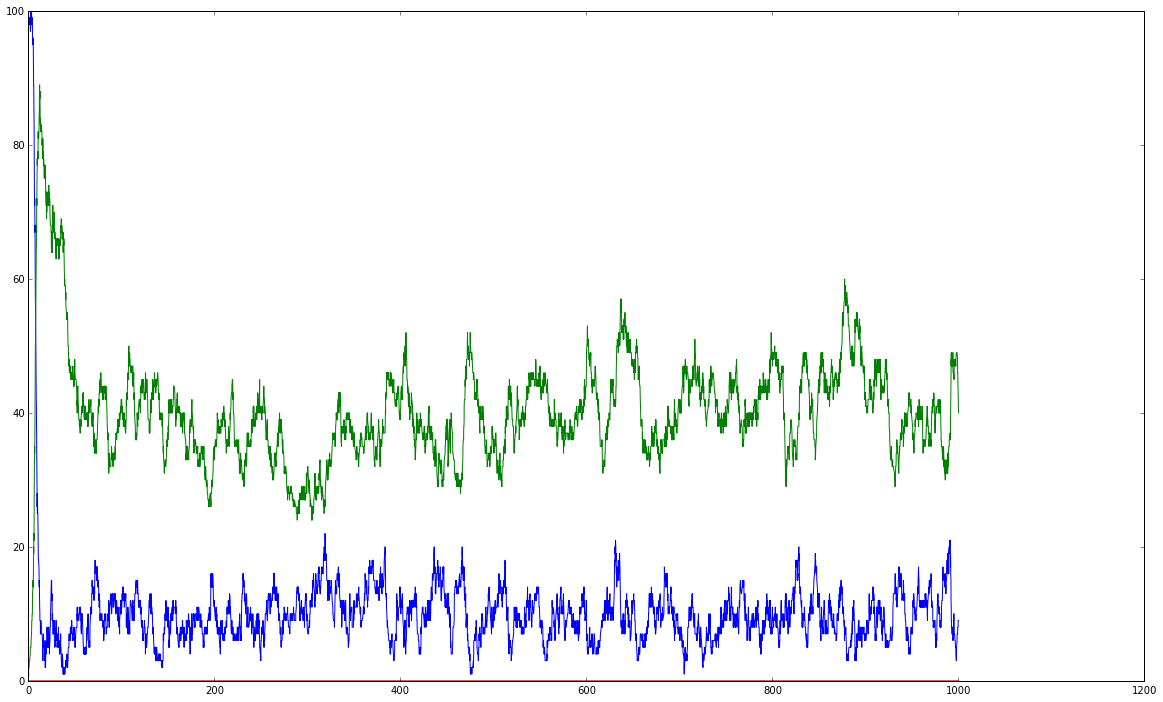

In [1]:
#coding=utf-8

from sympy import symbols
import numpy as np
import matplotlib.pyplot as pl

import gillespie
from gillespie import integrate
from gillespie import cython_propensity_function
reload(gillespie)

%matplotlib inline

X, Y, Z = symbols('X Y Z', integer=True)
B, l, mu, nu = symbols('β λ μ ν', real=True)

x = [X, Y, Z]

T = [
    {X: -1, Y: 1},
    {X: -1, Y: 1},
    {X:  1},
    {Y: -1}
]

prop = [
  B*X*Y,
  nu*X,
  l,
  mu*Y
]

ics = {
  X: 100,
  Y: 0
}

parm = {
  B: 0.005,
  l: 2,
  mu: 0.05,
  nu: 0.01
}

y = list(integrate(x, T, prop, parm, ics, 1000))
t, y1, y2, y3 = np.transpose(y)

pl.figure(figsize=(20,12))
ax = pl.plot(t, y1, t, y2, t, y3)

In [6]:

print x

[np.asarray(ics.get(xi,0)) for xi in x]


[X, Y, Z]


[array(100), array(0), array(0)]

In [26]:
np.array([100])+np.array([1,2])

array([101, 102])

In [49]:
import theano
import theano.tensor as tt

from theano.tensor.shared_randomstreams import RandomStreams

def go():
    
    X, Y = map(tt.dvector, "XY")
    B, l, mu, nu = map(tt.dscalar, ['β', 'λ', 'μ', 'ν'])
    n = 3
    var_v  = [X, Y]
    parm_v = [B, l, mu, nu]
    
    rng = RandomStreams(seed=233) #todo: makes sure it runs on GPU
    r_u = rng.uniform((1,n))
    
    t = [
        {X: -1, Y: 1},
        {X: -1, Y: 1},
        {X:  1},
        {Y: -1}
    ]
    
    T_ = np.asarray([
        [-1, 1],
        [-1, 1],
        [ 1, 0],
        [ 0,-1]
    ])
    print T_
    prop_v = [B*X*Y, nu*X, l, mu*Y]
    prop_t = sum(prop_v)
    prob_v = [p/prop_t for p in prop_v]
    v = tt.stack(prob_v).T
    
    prb_f = theano.function(var_v+parm_v, v)
    
    tau_f = theano.function(var_v+parm_v, (1/prop_t)*tt.log(1/r_u))
    
    ran_f = theano.function(var_v+parm_v, rng.multinomial(n=1, pvals=v))
    
    ics = [
        np.asarray([100,150,200]),
        np.asarray([0,0,20])
    ]
    parm = [0.001, 2, 0.05, 0.01]
    args = ics+parm

    prop_i = prb_f(*args)
    ran_i = ran_f(*args)

    print prop_i
    print ran_i
    time = tau_f(*args).T
    print time
    incr = np.dot(ran_i, T_)
    print incr
    r = np.zeros(shape=(3, 3, 2)) #(rep, var, time)
    print r
    print time.T.shape
    print (np.asarray(ics)+incr.T).shape
    
go()

[[-1  1]
 [-1  1]
 [ 1  0]
 [ 0 -1]]
[[ 0.          0.33333333  0.66666667  0.        ]
 [ 0.          0.42857143  0.57142857  0.        ]
 [ 0.44444444  0.22222222  0.22222222  0.11111111]]
[[0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]]
[[ 0.65577364]
 [ 0.70263769]
 [ 0.014262  ]]
[[-1  1]
 [ 1  0]
 [-1  1]]
[[[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]]
(1, 3)
(2, 3)


In [76]:
import sympy
x, y, z = symbols('x y z')
sympy.simplify(x*2 + 2*x - 4)

4*x - 4

In [96]:
import theano.tensor as T
x = T.dvector('x')
y = T.dmatrix('y')

fn = theano.function([x,y], 2*T.dot(x,y))

x_, y_ = np.array([1,2,3]), np.array([
        [3,2,1,5,1,7],
        [1,2,4,6,1,8],
        [4,5,6,7,1,1]
    ])

fn(x_,y_)

array([ 34.,  42.,  54.,  76.,  12.,  52.])

In [4]:
np.array([1,3,4]).T

array([1, 3, 4])

In [13]:
rng = RandomStreams(seed=234)

Z = T.dmatrix('Z')
fn_ = theano.function([Z], rng.multinomial(n=1, pvals=Z))

In [67]:
S = np.zeros(shape=(2,2), dtype=np.float32)

z = np.asarray(map(lambda i: fn_(np.array([[0.5,0.5],[0.1,0.9]])), range(10000)), dtype=np.float32)

print np.sum(z, axis=0)/np.sum(z, axis=(0,2), keepdims=True)


[[[ 0.4966      0.50340003]
  [ 0.0949      0.90509999]]]


In [31]:
sum([1,2])

3